# Prédiction de l'action du joueur de Tennis

**Lire les donées**

In [21]:
# Lecture des données

import numpy as np
from PIL import Image 
import glob
import cv2

# Label de la sortie
# 0 : cd
# 1 : rv
# 2 : sm
# 3 : sv

# 0 : rv
# 1 : rv_slice
# 2 : rv_vol
# 3 : rv_2_main
# 4 : cd_flat
# 5 : cd_OS
# 6 : cd_slice
# 7 : cd_vol
# 8 : sv_flat 
# 9 : sv_kick
# 10: sv_slice
# 11: sm

action_size = 12
data_size = 150
frame_size = 15
action_list = [0, 4, 8]
X = []
X_cnn = []
y = []
for k in action_list: # range(action_size): # chaque action
    for i in range(data_size): # chaque vidéo est une données
        D = []
        I = cv2.imread("F:/Tennis/prediction/frame_0.jpg")
        I = cv2.resize(I, (16, 12))
        for image in glob.glob(f"F:/Tennis/prediction/ac{k}/vid ({i})/*.jpg"): # for j in range(frame_size): # chaque frame est une variable, 16*12 * 15 = 2880
            # img = PIL.Image.open(f"F:/Tennis/prediction/ac{k}/vid ({i})/frame_0{j}.jpg").convert("L")
            img = Image.open(image).convert("L")
            img = img.resize((16, 12))
            imgarr = np.array(img)
            img_row = imgarr.reshape(-1) # transformer en ligne
            D = np.append(D, img_row)
            img = cv2.imread(image) # (longueur, hauteur, channel)
            img = cv2.resize(img, (16, 12)) # (int(img.shape[0] / 40), int(img.shape[1] / 40)))
            I = np.hstack((I, img))
            # image = np.vstack((img1, img2)) # concaténation verticale des frames
            # image = np.hstack((img1, img2)) # concaténation horizontale des frames
        X.append(D)
        X_cnn.append(I)
        y.append(k/4)
X = np.array(X)
X_cnn = np.array(X_cnn)
y = np.array(y)

In [22]:
# Visualisation des données

print(len(X))
print(X.shape, X[20].shape, X[21][2833])
print(type(X), type(X[0]), type(X[0][0]))
print(len(X_cnn))
print(X_cnn.shape, X_cnn[20].shape, X_cnn[21][6].shape)
print(type(X_cnn), type(X_cnn[0]), type(X_cnn[0][0]))
print(len(y))
print(y.shape, y[101])
print(type(y), type(y[101]))

450
(450, 2880) (2880,) 0.0
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float64'>
450
(450, 12, 256, 3) (12, 256, 3) (256, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
450
(450,) 0.0
<class 'numpy.ndarray'> <class 'numpy.float64'>


In [23]:
# Préparation de l'ensemble de test

import numpy as np
import PIL
from PIL import Image 
test_size = 15
frame_size = 15
X_test = []
X_test_cnn = []

# [0 0 0 0 0 4 4 4 4 4 8 8 8 8 8]

for i in range(test_size): # chaque vidéo est une données
        T = []
        I = cv2.imread("F:/Tennis/prediction/frame_0.jpg")
        I = cv2.resize(I, (16, 12))
        for image in glob.glob(f"F:/Tennis/prediction/test/test{i}/*.jpg"): # for j in range(frame_size): # chaque frame est une variable, 16*12 * 15 = 2880
            # img = PIL.Image.open(f"F:/Tennis/prediction/test/test{i}/frame_{j}.jpg").convert("L")
            img = Image.open(image).convert("L")
            img = img.resize((16, 12))
            imgarr = np.array(img)
            img_row = imgarr.reshape(-1) # transformer en ligne
            T = np.append(T, img_row)
            img = cv2.imread(image) # (longueur, hauteur, channel)
            img = cv2.resize(img, (16, 12)) # (int(img.shape[0] / 40), int(img.shape[1] / 40)))
            I = np.hstack((I, img))
        X_test.append(T)
        X_test_cnn.append(I)
X_test = np.array(X_test)
X_test_cnn = np.array(X_test_cnn)
print(X_test.shape)
print(X_test_cnn.shape)

(15, 2880)
(15, 12, 256, 3)


In [24]:
# Test de la compression des images

import cv2

img = cv2.imread('frame_0.jpg')
print(img.shape)
#x, y = img.shape[0:2]
# cv2.imshow('OriginalPicture', img)
 
img_test1 = cv2.resize(img, (int(img.shape[0] / 40), int(img.shape[1] / 40)))
print(img_test1.shape)
# cv2.imshow('resize0', img_test1)

img = PIL.Image.open("F:/Tennis/prediction/frame_0.jpg").convert("L") # L = R * 299/1000 + G * 587/1000 + B * 114/1000 # ("RGB")
img = img.resize((20, 20))
img = img.save("F:/Tennis/prediction/frame_0_test.jpg")

(480, 640, 3)
(16, 12, 3)


**K-means**

In [25]:
# from sklearn.cluster import KMeans
# import numpy as np
# import matplotlib.pyplot as plt

# X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
# kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X, y)
# kmeans.labels_
# kmeans.predict([[0, 0], [12, 3]])
# kmeans.cluster_centers_

# plt.scatter(X, y, c=kmeans.labels_)
# plt.show()

**Réseaux de neurones**

In [26]:
# Construction du model avec tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential(
    [               
        tf.keras.Input(shape = 2880), # 16*12 * 15 = 2880
        Dense(units=16, activation="relu"),
        Dense(units=32, activation="relu"),
        Dense(units=64, activation="sigmoid"),
        Dense(units=128, activation="relu"),
        Dense(units=3, activation="softmax"),
    ]
)          
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                46096     
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 3)                 387       
                                                                 
Total params: 57,459
Trainable params: 57,459
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model.compile(
    #optimizer = 'RMSprop', loss = 'categorical_crossentropy', metrics = ['acc']
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), # 'Adam',
    metrics=['accuracy']
)

history = model.fit(
    X, y,
    epochs = 50,
    # batch_size = 32 # données transmises pour une session
)

prediction = model.predict(X_test) # np.expand_dims(X_test, axis = 1)
print (prediction)
# prediction_p = tf.nn.softmax(prediction)
# yhat = np.argmax(prediction)

# Softmax
# def softmax(z):  
#     ez = np.exp(z)
#     a = ez/np.sum(ez)
#     return a


Epoch 1/50
15/15 [==============================] - 1s 1ms/step - loss: 1.0976 - accuracy: 0.3933
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0853 - accuracy: 0.4067
Epoch 3/50
15/15 [==============================] - 0s 1ms/step - loss: 1.0296 - accuracy: 0.5067
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.9908 - accuracy: 0.4844
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.9184 - accuracy: 0.5756
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.8173 - accuracy: 0.6933
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.7434 - accuracy: 0.6978
Epoch 8/50
15/15 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7756
Epoch 9/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.8111
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8556
Epoch 11/50
15/15 [

# [0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8]
# [0, 0, 0, 0, 0, 8, 4, 4, 4, 4, 8, 8, 8, 8, 8]
# 14/15

**Réseau neuronal convolutif**

In [28]:
# construction du modèle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

model_cnn = Sequential(
    [
        Conv2D(32, (3, 3), activation='relu', input_shape=(12, 256, 3)), # kernel_size, strides, padding = 'same'
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Conv2D(128, (3, 3), activation='relu'),
        # BatchNormalization(),
        # MaxPooling2D(pool_size=(2, 2)),
        # Dropout(0.25),
        
        Flatten(),
        # Dense(512, activation='relu'),
        # BatchNormalization(),
        # Dropout(0.5),
        Dense(3, activation='softmax')
    ]
)            
model_cnn.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # loss pour one-hot coding
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 10, 254, 32)       896       
                                                                 
 batch_normalization_2 (Batc  (None, 10, 254, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 127, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 127, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 125, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 3, 125, 64)      

In [29]:
# entraînement du modèle

import tensorflow as tf

history_cnn = model_cnn.fit(
    X_cnn, tf.keras.utils.to_categorical(y, 3), # one-hot coding
    epochs = 50,
)

Epoch 1/50
15/15 [==============================] - 1s 42ms/step - loss: 3.4206 - accuracy: 0.4267
Epoch 2/50
15/15 [==============================] - 1s 42ms/step - loss: 1.3672 - accuracy: 0.6044
Epoch 3/50
15/15 [==============================] - 1s 43ms/step - loss: 1.0526 - accuracy: 0.6822
Epoch 4/50
15/15 [==============================] - 1s 42ms/step - loss: 0.6921 - accuracy: 0.7800
Epoch 5/50
15/15 [==============================] - 1s 44ms/step - loss: 0.6421 - accuracy: 0.8200
Epoch 6/50
15/15 [==============================] - 1s 43ms/step - loss: 0.5468 - accuracy: 0.8089
Epoch 7/50
15/15 [==============================] - 1s 45ms/step - loss: 0.4938 - accuracy: 0.8333
Epoch 8/50
15/15 [==============================] - 1s 43ms/step - loss: 0.3841 - accuracy: 0.8644
Epoch 9/50
15/15 [==============================] - 1s 46ms/step - loss: 0.3075 - accuracy: 0.9044
Epoch 10/50
15/15 [==============================] - 1s 43ms/step - loss: 0.3254 - accuracy: 0.8800
Epoch 11/

In [30]:
# prédiction sur l'ensemble de test

prediction_cnn = model_cnn.predict(X_test_cnn)
print(prediction_cnn)

1/1 [==============================] - 0s 75ms/step
[[9.9999475e-01 5.1947682e-06 1.3419181e-08]
 [9.9754143e-01 2.4574550e-03 1.2387873e-06]
 [1.0000000e+00 3.2370944e-09 4.7044899e-11]
 [9.9245584e-01 7.5441813e-03 8.9770751e-09]
 [9.9942732e-01 5.7272182e-04 3.0454000e-10]
 [4.4270095e-07 9.9997687e-01 2.2672019e-05]
 [1.1535781e-05 9.9998772e-01 6.7274880e-07]
 [1.9134164e-07 9.9999964e-01 8.6829488e-08]
 [2.0246675e-09 1.0000000e+00 2.5213835e-09]
 [2.3645624e-03 9.9763024e-01 5.1384286e-06]
 [1.3047676e-06 7.4149085e-08 9.9999857e-01]
 [3.7606722e-05 5.7173298e-07 9.9996185e-01]
 [1.5653608e-09 1.1247546e-06 9.9999893e-01]
 [6.0413619e-08 4.0001339e-11 9.9999988e-01]
 [5.0699125e-11 9.9219229e-05 9.9990082e-01]]


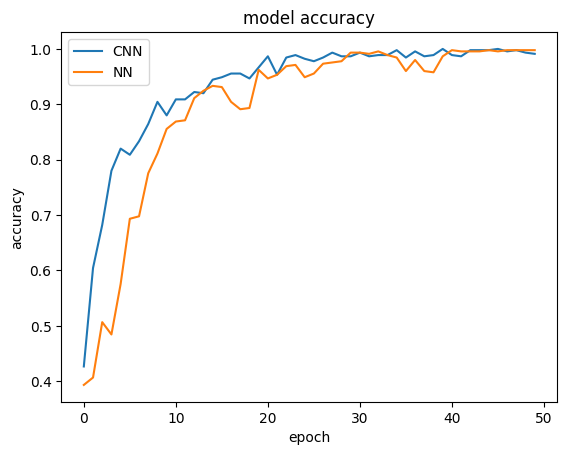

In [31]:
# visualisation 

from matplotlib import pyplot as plt

# "Accuracy"
plt.plot(history_cnn.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'NN'], loc='upper left')
plt.show()

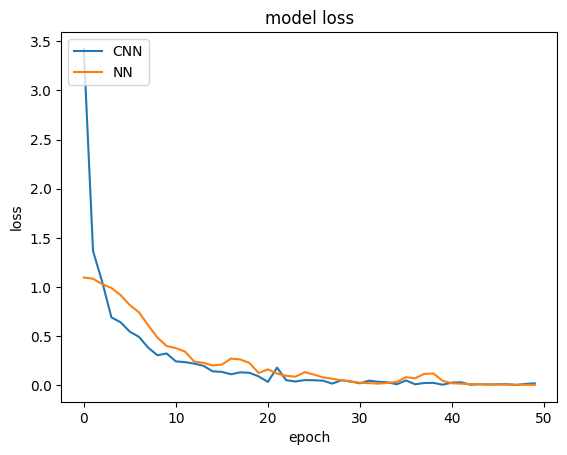

In [32]:
# "Loss"
plt.plot(history_cnn.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN', 'NN'], loc='upper left')
plt.show()

# [0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8]
# [0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 8, 8, 8, 8, 8]
# 15/15

# N.B: squelette, position

In [33]:
# Modèle général pour tester les paramètres

# def neural_network(num_layer, units, learning_rate=0.01):
#     """
#     Parameters
#     ----------
#     num_layer       : int
#                     number of layers
#     units           : list
#                     number of units in each layer
#     learning_rate   : float
#                     learning rate of the optimizer of the model
#     """
#     if (len(units) != num_layer):
#         raise ValueError("Number of list of units must be equal to number of layers")
#     model = Sequential()
#     model.add(Dense(units=units[0], input_dim=X_train.shape[1], activation="relu"))
#     for i in range(1, num_layer-1):
#         model.add(Dense(units=units[i], activation="relu"))
#     model.add(Dense(units=1, activation="linear"))
#     model.compile(
#         loss=tf.keras.losses.MeanAbsoluteError(),
#         optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
#         metrics=[tf.keras.metrics.MeanAbsoluteError()]
#     )


In [34]:
# Evaluation des modèle

# histories_neural_network = []
# def neural_network_score(num_layer, units, learning_rate=[0.001, 0.01, 0.1]):
#     """
#     Parameters
#     ----------
#     num_layer       : int
#                     number of layers
#     units           : list
#                     number of units in each layer
#     learning_rate   : list
#                     learning rate of the optimizer of the model
#     """
#     if (len(units) != num_layer):
#         raise ValueError('Le nombre de couches doit être égale à la taille de la liste des neurones')
#     for i in range(len(learning_rate)):
#         model = neural_network(num_layer, units, learning_rate=learning_rate[i])
#         model.save(f"neural_network_model_{i}.h5")
#         history = model.fit(
#             X_train, y_train,
#             epochs=50,
#             batch_size=50,
#             validation_split=0.2
#         )
#         histories_neural_network.append(history)
#         y_pred = model.predict(X_test)
#         y_pred = np.reshape(y_pred, (y_pred.shape[0],))
#         print(f'TEST - R2 score avec le taux {learning_rate[i]} : {r2_score(y_test_numpy, y_pred)}')
#         print(f'TEST - MAE score avec le taux {learning_rate[i]} : {history.history["val_loss"][-1]}')

In [35]:
# Entraînement des différents modèles

# num_layer = 4
# units = [128, 256, 256, 1]
# neural_network_score(num_layer, units)

In [36]:
#Visualiser les traces

# from sklearn.metrics import r2_score

# plt.plot(histories_neural_network[0].history['val_loss'])
# plt.plot(histories_neural_network[1].history['val_loss'])
# plt.plot(histories_neural_network[2].history['val_loss'])
# plt.title('Model loss')  
# plt.ylabel('Val Loss')  
# plt.xlabel('Epoch')  
# plt.legend(['taux = 0.001', 'taux = 0.01', 'taux = 0.1'], loc='upper right')  
# plt.show()

In [37]:
# Test de la performance

#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from math import sqrt

# X_test_numpy = np.array(X_test)
# y_test_numpy = np.array(y_test)
# y_pred = model.predict(X_test_numpy)
# y_pred = np.reshape(y_pred, (y_pred.shape[0],))
# plt.scatter(y_test, y_pred, color="b")
# plt.plot(y_test, y_test, color="r")
# r2_nn = r2_score(y_test_numpy, y_pred)
# print('TEST - R2 score - Réseau de neurones: ', r2_nn)

# ----------------------------------------------------------------

**Forêt aléatoire**

In [38]:
# lecture des données

import pandas as pd

df = pd.read_csv("F:/Tennis/trajectoire/pos.csv")
print(df.info)
df.head()

<bound method DataFrame.info of             col1        col2        col3        col4        col5        col6   
0     (175, 232)  (184, 227)  (195, 229)  (200, 215)  (196, 213)  (206, 214)  \
1     (176, 232)  (191, 229)  (188, 233)  (200, 216)  (205, 217)  (208, 210)   
2     (176, 236)  (191, 226)  (196, 227)  (200, 221)  (199, 221)  (198, 214)   
3     (176, 238)  (184, 236)  (191, 224)  (189, 214)  (194, 215)  (198, 210)   
4     (176, 242)  (185, 231)  (191, 228)  (187, 224)  (195, 219)  (205, 215)   
...          ...         ...         ...         ...         ...         ...   
6458  (424, 241)  (418, 239)  (417, 230)  (413, 218)  (420, 203)  (411, 197)   
6459  (424, 243)  (418, 237)  (415, 228)  (415, 224)  (408, 211)  (417, 196)   
6460  (424, 244)  (419, 237)  (424, 226)  (416, 229)  (416, 210)  (413, 205)   
6461  (424, 248)  (416, 243)  (416, 224)  (412, 218)  (420, 203)  (407, 199)   
6462  (424, 248)  (415, 235)  (416, 230)  (419, 226)  (412, 209)  (408, 204)   

       

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46
0,"(175, 232)","(184, 227)","(195, 229)","(200, 215)","(196, 213)","(206, 214)","(215, 214)","(207, 208)","(217, 194)","(217, 195)",...,"(350, 126)","(358, 136)","(356, 121)","(360, 125)","(370, 119)","(374, 114)","(371, 110)","(380, 108)","(391, 93)",2
1,"(176, 232)","(191, 229)","(188, 233)","(200, 216)","(205, 217)","(208, 210)","(211, 213)","(215, 209)","(221, 196)","(218, 191)",...,"(346, 128)","(354, 124)","(357, 117)","(361, 122)","(364, 121)","(377, 110)","(374, 107)","(383, 97)","(382, 101)",2
2,"(176, 236)","(191, 226)","(196, 227)","(200, 221)","(199, 221)","(198, 214)","(214, 204)","(212, 206)","(224, 192)","(219, 194)",...,"(350, 129)","(352, 131)","(362, 120)","(357, 119)","(361, 113)","(375, 106)","(377, 110)","(378, 97)","(383, 95)",2
3,"(176, 238)","(184, 236)","(191, 224)","(189, 214)","(194, 215)","(198, 210)","(206, 204)","(216, 211)","(216, 195)","(218, 188)",...,"(346, 128)","(359, 124)","(360, 122)","(357, 119)","(365, 120)","(368, 105)","(380, 108)","(384, 96)","(386, 94)",2
4,"(176, 242)","(185, 231)","(191, 228)","(187, 224)","(195, 219)","(205, 215)","(202, 207)","(218, 208)","(220, 199)","(219, 198)",...,"(347, 127)","(353, 127)","(358, 120)","(362, 114)","(369, 113)","(374, 105)","(373, 109)","(380, 98)","(392, 102)",2


In [39]:
# conversion du type

import math as m

def conv(a):  
    a = a[1:len(a) - 1]
    l = a.split(',')
    return m.sqrt(m.pow(float(l[0]), 2) + m.pow(float(l[1]), 2))

a = df['col2'][1]
print(a)
a = a[1:len(a) - 1]
print(type(a))
l = a.split(',')
print(l)
print(type(l))
s = m.sqrt(m.pow(float(l[0]), 2) + m.pow(float(l[1]), 2))
print(s)
print(type(s))

# préparation de l'ensemble

from sklearn.model_selection import train_test_split

X = df.drop('col46', axis=1)
y = df['col46']

data_size = 6463 # 7271 - 400
for col in X:
    for lig in range(data_size):
        X[col][lig] = conv(X[col][lig])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

a = X['col2'][1]
print(a)
print(type(a))
print(type(X), X.shape)

(191, 229)
<class 'str'>
['191', ' 229']
<class 'list'>
298.197920851236
<class 'float'>
298.197920851236
<class 'float'>
<class 'pandas.core.frame.DataFrame'> (6463, 45)


In [40]:
# lecture des données

import pandas as pd

df_test = pd.read_csv("F:/Tennis/trajectoire/pos_test.csv")
# print(df.info)
# df.head()

# conversion du type

import math as m

def conv(a):  
    a = a[1:len(a) - 1]
    l = a.split(',')
    return m.sqrt(m.pow(float(l[0]), 2) + m.pow(float(l[1]), 2))

a = df_test['col2'][1]
print(a)
a = a[1:len(a) - 1]
print(type(a))
l = a.split(',')
print(l)
print(type(l))
s = m.sqrt(m.pow(float(l[0]), 2) + m.pow(float(l[1]), 2))
print(s)
print(type(s))

# préparation de l'ensemble

X_test1 = df_test.drop('col46', axis=1)
y_test1 = df_test['col46']

data_size = 62 # 7271
for col in X_test1:
    for lig in range(data_size):
        X_test1[col][lig] = conv(X_test1[col][lig])

a = X_test1['col2'][1]
print(a)
print(type(a))
print(type(X_test1), X_test1.shape)

(248.5, 78.5)
<class 'str'>
['248.5', ' 78.5']
<class 'list'>
260.60410587709475
<class 'float'>
260.60410587709475
<class 'float'>
<class 'pandas.core.frame.DataFrame'> (62, 45)


<Axes: xlabel='col46', ylabel='count'>

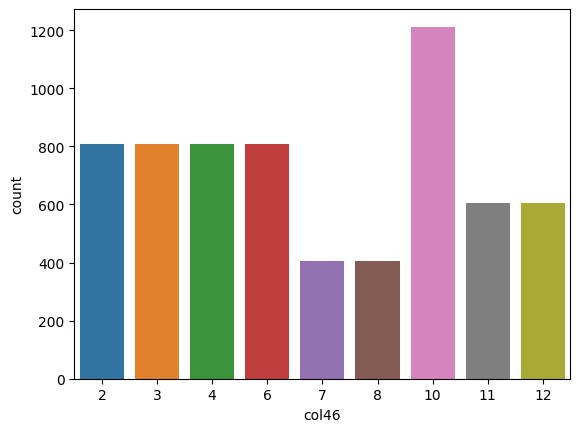

In [41]:
# visualisation

import seaborn as sns

sns.countplot(x='col46', data=df)

In [42]:
# entraînement et prédiction

from sklearn.ensemble import RandomForestClassifier
import numpy as np

rf_clf = RandomForestClassifier(n_estimators = 100)
# max_samples : indique le nombre d'échantillons à tirer des données d'entraînement dans l'échantillonnage Bootstrap. 
# max_depth : indique la profondeur maximale de l'arbre, que nous spécifions si nécessaire.
# n_estimators : indique le nombre d'arbres de décision à créer dans le modèle de forêt aléatoire. Par défaut, il est de 100.
rf_clf.fit(X_train, y_train)

pred = rf_clf.predict(X_test)

# test de la précision

# print(type(np.array(y_test)), y_test.shape)
# print(y_test)
# print(type(pred), pred.shape)
# print(pred)
print(rf_clf.score(X_test1, y_test1))
print(rf_clf.score(X_train, y_train))

0.3387096774193548
1.0


**Arbre de décision**

In [46]:
# entraînement

from sklearn import tree

ad_clf = tree.DecisionTreeClassifier(max_depth = 5)
ad_clf = ad_clf.fit(X_train, y_train)

In [47]:
# test de la performance

pred = ad_clf.predict(X_test)
print(ad_clf.score(X_test, y_test))

0.6635730858468677


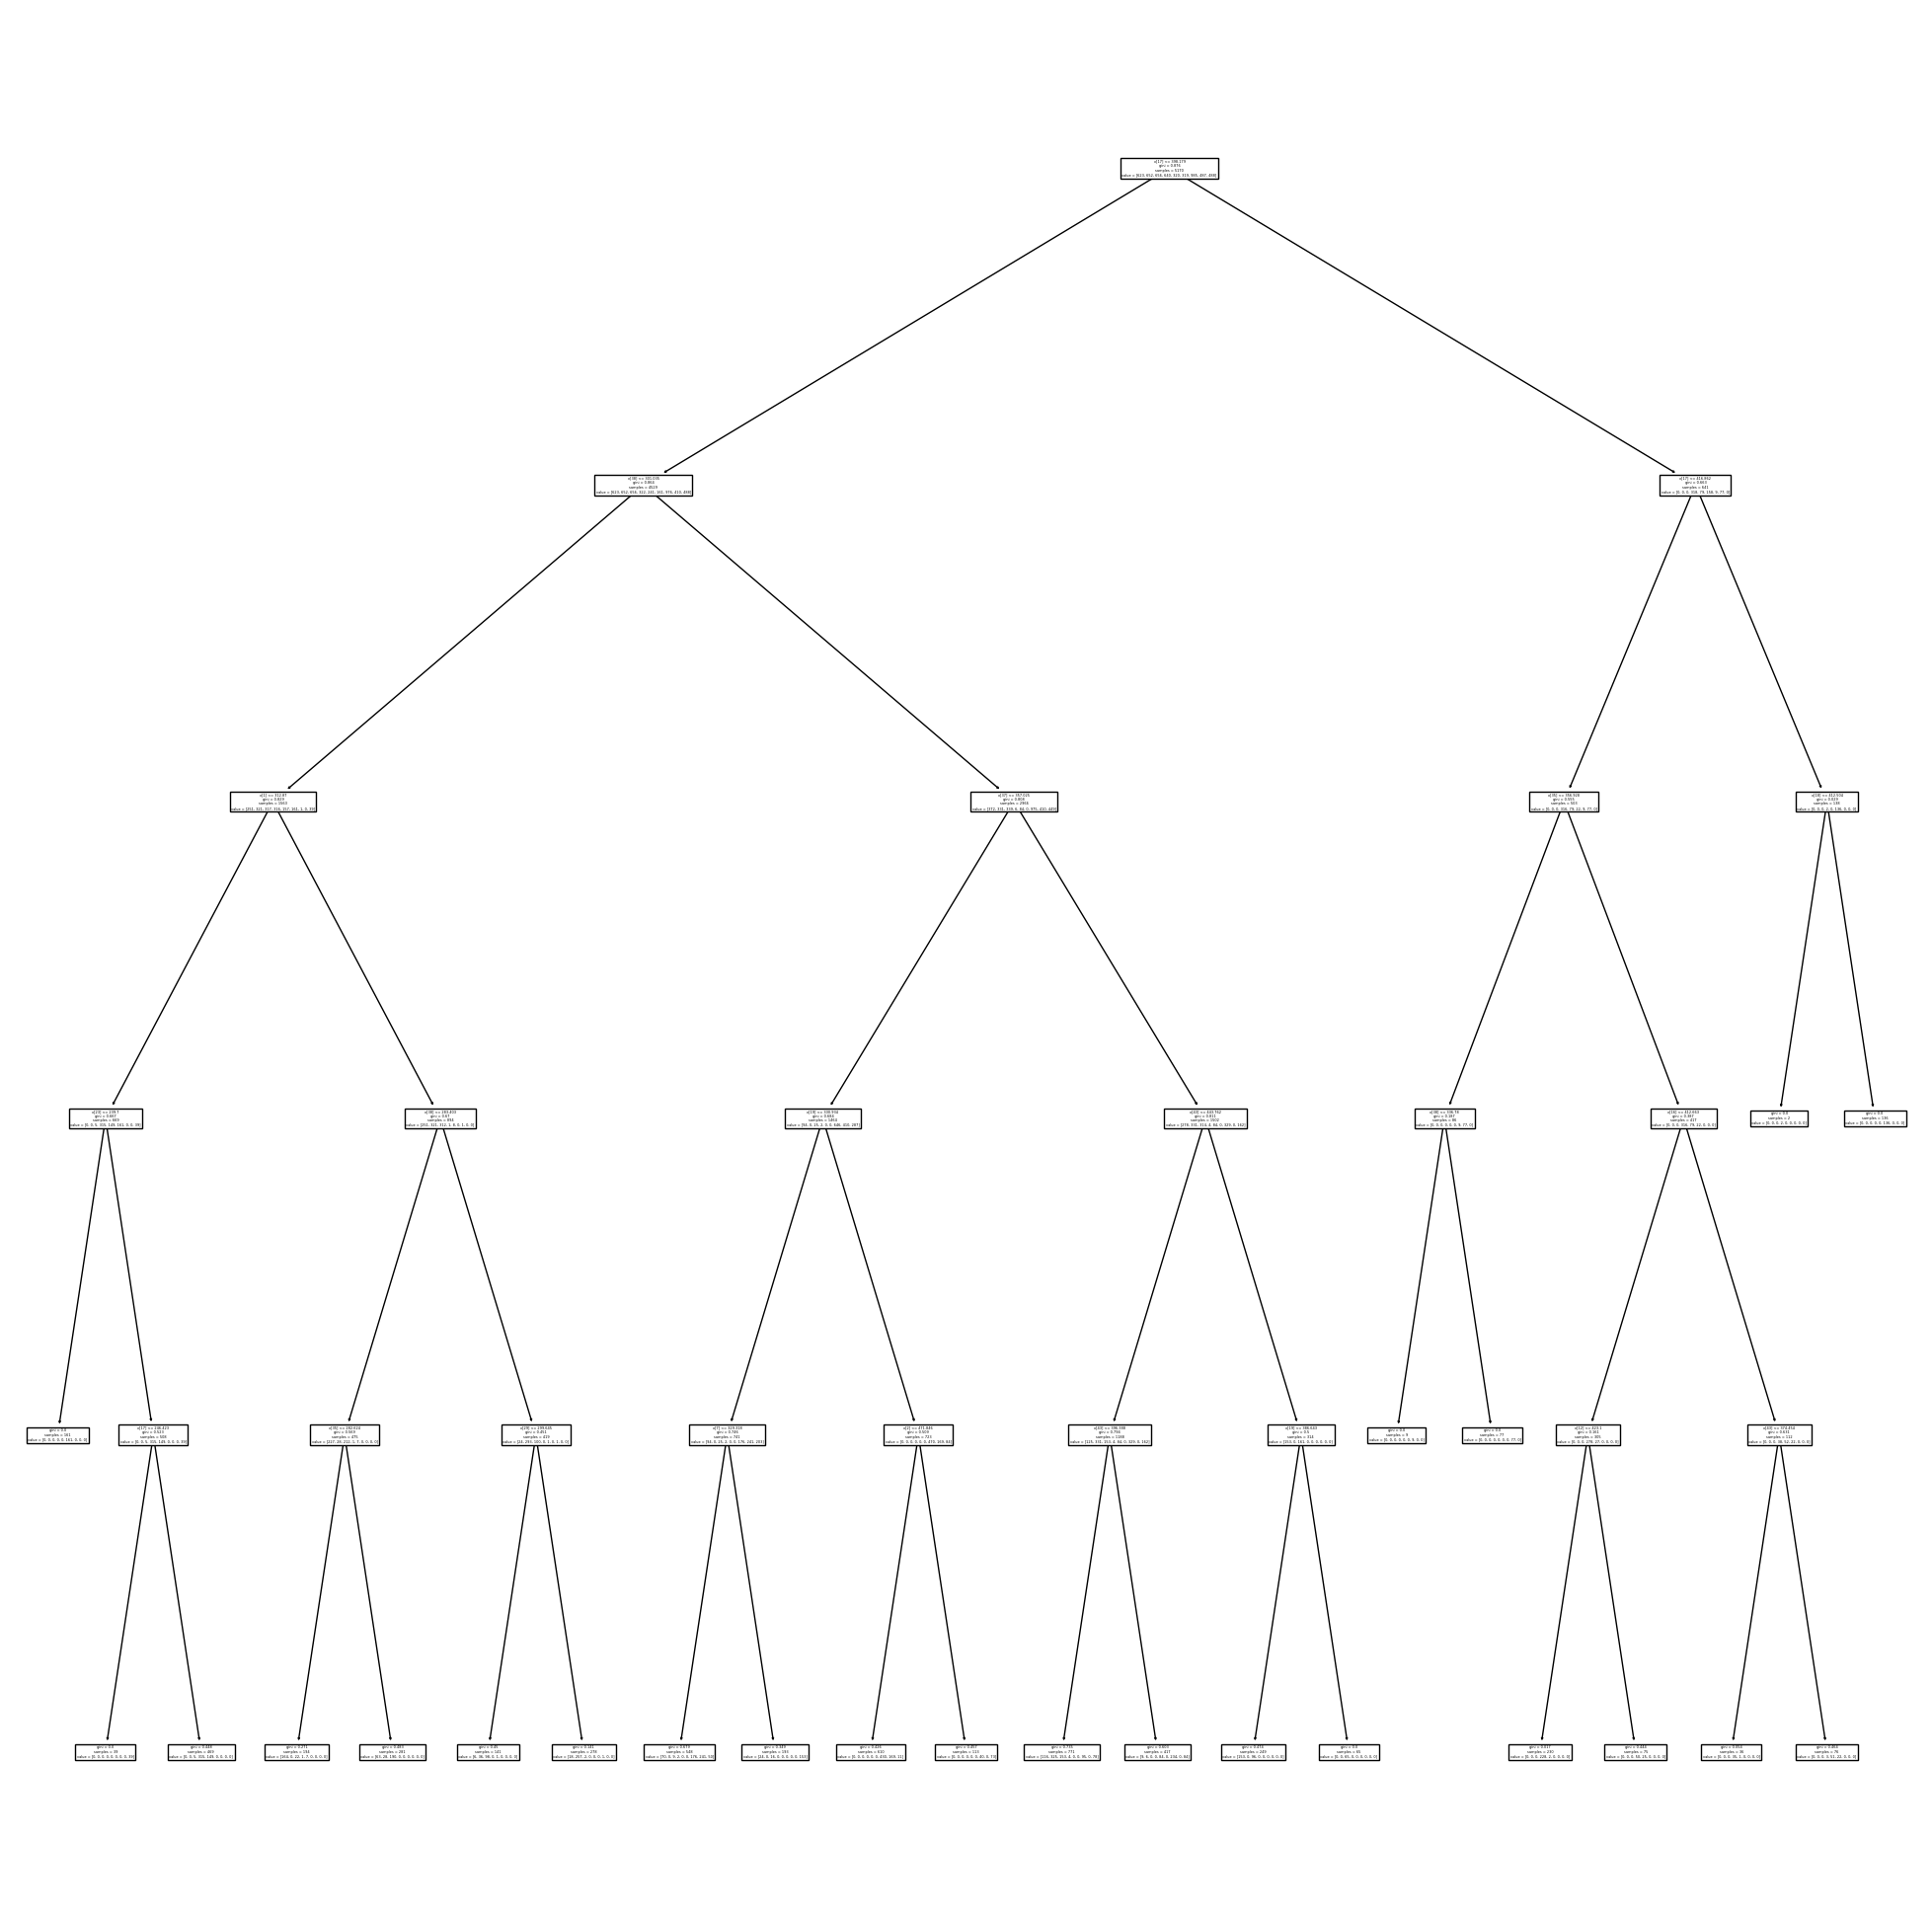

In [49]:
# visualisation de l'arbre

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,25))
tree.plot_tree(ad_clf);

# FIN